In [90]:
!nvidia-smi

Fri May 24 17:24:41 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.22                 Driver Version: 552.22         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   59C    P8              8W /   39W |     950MiB /   4096MiB |      1%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [91]:
import torch
print(torch.cuda.is_available())

print(torch.version.cuda)
print(torch.cuda.get_arch_list())
print(torch.cuda.get_device_capability())

True
11.7
['sm_37', 'sm_50', 'sm_60', 'sm_61', 'sm_70', 'sm_75', 'sm_80', 'sm_86', 'compute_37']
(8, 6)


In [92]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

https://github.com/rois-codh/kmnist?tab=readme-ov-file

In [93]:
#学習データ
x_train = np.load(r'C:\Users\hmina\OneDrive\デスクトップ\tarantula\practice\Lesson5\kmnist-train-imgs.npz')['arr_0']
t_train = np.load(r'C:\Users\hmina\OneDrive\デスクトップ\tarantula\practice\Lesson5\kmnist-train-labels.npz')['arr_0']

#テストデータ
x_test = np.load(r'C:\Users\hmina\OneDrive\デスクトップ\tarantula\practice\Lesson5\kmnist-test-imgs.npz')['arr_0']
t_test = np.load(r'C:\Users\hmina\OneDrive\デスクトップ\tarantula\practice\Lesson5\kmnist-test-labels.npz')['arr_0']

# データの前処理（正規化)
x_train, x_test = x_train / 255., x_test / 255.
x_train, x_test = x_train.reshape(x_train.shape[0], -1), x_test.reshape(x_test.shape[0], -1) # 256 + 256次元になっている（連ねた感じ）

In [94]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
print(t_train.tolist())
print(t_test.tolist())

[0, 6, 9, 3, 0, 6, 5, 2, 4, 2, 5, 4, 0, 6, 7, 1, 3, 0, 9, 7, 7, 1, 4, 6, 8, 7, 8, 3, 7, 1, 6, 8, 7, 2, 6, 2, 8, 7, 1, 0, 4, 4, 7, 3, 1, 3, 7, 9, 0, 5, 3, 2, 6, 1, 2, 8, 7, 5, 7, 3, 5, 8, 1, 5, 6, 4, 4, 1, 2, 8, 2, 1, 0, 6, 9, 7, 0, 9, 2, 9, 8, 9, 1, 2, 1, 6, 9, 4, 6, 3, 0, 9, 7, 2, 0, 9, 1, 8, 2, 2, 9, 7, 6, 0, 2, 4, 3, 5, 6, 0, 3, 0, 6, 3, 9, 0, 5, 8, 9, 4, 0, 3, 7, 5, 7, 9, 3, 1, 6, 1, 5, 0, 5, 1, 8, 4, 9, 5, 3, 7, 5, 3, 4, 6, 4, 3, 2, 4, 9, 2, 3, 7, 5, 9, 6, 8, 0, 1, 9, 3, 4, 2, 3, 5, 1, 5, 4, 4, 9, 7, 3, 4, 0, 9, 5, 6, 6, 1, 5, 9, 4, 8, 5, 6, 6, 1, 8, 6, 7, 6, 0, 7, 5, 8, 1, 1, 8, 8, 8, 3, 3, 7, 4, 6, 6, 1, 2, 8, 8, 5, 5, 7, 8, 8, 8, 8, 5, 8, 6, 6, 1, 6, 0, 0, 6, 8, 5, 9, 9, 2, 1, 0, 6, 4, 0, 3, 7, 4, 2, 8, 9, 1, 9, 0, 7, 7, 8, 7, 4, 8, 7, 3, 6, 5, 2, 0, 1, 6, 5, 0, 7, 4, 3, 1, 9, 1, 6, 5, 1, 0, 8, 5, 0, 8, 8, 2, 8, 0, 0, 5, 7, 0, 7, 4, 1, 1, 3, 5, 0, 6, 5, 8, 0, 9, 3, 3, 0, 5, 5, 1, 9, 2, 3, 2, 3, 3, 5, 8, 8, 8, 1, 2, 4, 8, 3, 0, 0, 3, 7, 1, 8, 1, 3, 5, 2, 3, 7, 7, 8, 4, 5, 8, 3, 

findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: 

[4265, 4197, 4218, 4180, 4281, 4153, 4138, 4120, 4205, 4243]


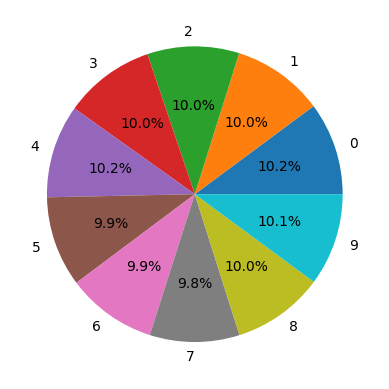

In [123]:
import matplotlib.pyplot as plt

labels = [0,1,2,3,4,5,6,7,8,9]
data_num = [0] * 10

# t_train がどのように定義されているかによっては、下記のループの形式が変わるかもしれません
for label in t_train.tolist():
    data_num[label] += 1

print(data_num)

fig, ax = plt.subplots()
ax.pie(data_num, labels=labels, autopct="%1.1f%%")
plt.show()


findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: Font family 'IPAGothic' not found.
findfont: 

[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


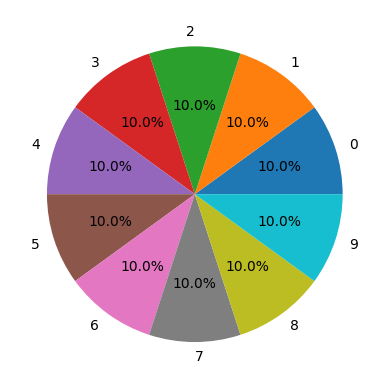

In [124]:
import matplotlib.pyplot as plt

labels = [0,1,2,3,4,5,6,7,8,9]
data_num = [0] * 10

# t_train がどのように定義されているかによっては、下記のループの形式が変わるかもしれません
for label in t_test.tolist():
    data_num[label] += 1

print(data_num)

fig, ax = plt.subplots()
ax.pie(data_num, labels=labels, autopct="%1.1f%%")
plt.show()


In [95]:
from sklearn.model_selection import train_test_split
# データの分割
x_train, x_val, t_train, t_val = train_test_split(x_train, t_train, test_size=0.3, random_state=42)
print(len(x_train))
print(len(x_val))
print(len(x_test))

42000
18000
10000


In [96]:
x_train, t_train = torch.tensor(x_train, dtype=torch.float32), torch.tensor(t_train, dtype=torch.long)
x_val, t_val = torch.tensor(x_val, dtype=torch.float32), torch.tensor(t_val, dtype=torch.long)
x_test, t_test = torch.tensor(x_test, dtype=torch.float32), torch.tensor(t_test, dtype=torch.long)

# データローダーの作成
train_dataset = TensorDataset(x_train, t_train)
val_dataset = TensorDataset(x_val, t_val)
test_dataset = TensorDataset(x_test, t_test)
# バッチ処理（小さなバッチに分割しメモリ効率向上），シャッフル（訓練データを並べ替え），並列処理（データの読み込みを並行して行う）
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [97]:
# logの中身が0になることを防ぐ
def np_log(x):
    return np.log(np.clip(x, 1e-10, 1e+10))

class Dense(nn.Module):  # nn.Moduleを継承する
    def __init__(self, in_dim, out_dim, function=lambda x: x):
        super().__init__()
        # He Initialization
        # in_dim: 入力の次元数、out_dim: 出力の次元数
        self.W = nn.Parameter(torch.tensor(np.random.uniform(
                        low=-np.sqrt(6/in_dim),
                        high=np.sqrt(6/in_dim),
                        size=(in_dim, out_dim)
                    ).astype('float32')))
        self.b = nn.Parameter(torch.tensor(np.zeros([out_dim]).astype('float32')))
        self.function = function

    def forward(self, x):  # forwardをoverride
        return self.function(torch.matmul(x, self.W) + self.b)

# 簡単な2層MLPモデル
class MLP(nn.Module):
    def __init__(self, in_dim, hid_dim, out_dim):
        super(MLP, self).__init__()
        self.linear1 = Dense(in_dim, hid_dim, function=nn.ReLU())
        # nn.CrossEntropyLossにはsoftmaxが含まれているためこちらでは設定しない
        self.linear2 = Dense(hid_dim, out_dim, function=nn.Identity()) # ここsoftmaxに変えてみる

    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        return x

In [98]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [99]:
in_dim = 784 # 28 * 28
hid_dim = 200 # Grid Search使いながら試すのでOK
out_dim = 10
lr = 0.001
batch_size = 32
n_epochs = 50


mlp = MLP(in_dim, hid_dim, out_dim).to(device)

optimizer = optim.Adam(mlp.parameters(), lr=lr)

In [100]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

train_losses = []
valid_losses = []

for epoch in range(n_epochs):
    losses_train = []
    losses_valid = []
    train_num = 0
    train_true_num = 0
    valid_num = 0
    valid_true_num = 0

    mlp.train()  # 訓練時には勾配を計算するtrainモードにする
    for x, t in train_loader:
        # テンソルをGPUに移動
        x = x.to(device) # 32個の画像
        t = t.to(device).long() # 画像に対するラベルが1*32のベクトル形式で入っている
        
        # 順伝播
        y = mlp.forward(x)

        # 誤差の計算(クロスエントロピー誤差関数), 確率を計算する（ラベル自体は計算に必要ない）
        loss = F.cross_entropy(y, t) # y(32*10)=32個の画像に対して10クラスの各確率がある, t(1*32)はどちらもベクトル

        # F.cross_entropyの中でpredの計算みたいな感じで確率計算までしているが，returnされないので出力としては得られない（たぶん）
        # モデルの出力を予測値のスカラーに変換，番号をとっている
        pred = y.argmax(1) # 1番大きな値を予測にしている（softmaxいれると確率的になるので精度上がるかも）

        # 誤差の逆伝播
        optimizer.zero_grad()
        loss.backward()

        # パラメータの更新
        optimizer.step()

        losses_train.append(loss.item())

        acc = (pred == t).float().sum().item() # 1*32のベクトル同士の比較，32個の画像に対して答え合わせしている（正解数，率ではない）
        train_num += t.size(0)
        train_true_num += acc

    mlp.eval()  # 評価時には勾配を計算しないevalモードにする
    for x, t in val_loader:
        # テンソルをGPUに移動
        x = x.to(device)
        t = t.to(device)
        
        # 順伝播
        y = mlp.forward(x)

        # 誤差の計算(クロスエントロピー誤差関数)
        loss = F.cross_entropy(y, t)

        # モデルの出力を予測値のスカラーに変換
        pred = y.argmax(1)

        losses_valid.append(loss.item())

        acc = (pred == t).float().sum().item()
        valid_num += t.size(0)
        valid_true_num += acc
    
    train_losses.append(np.mean(losses_train))
    valid_losses.append(np.mean(losses_valid))

    print('EPOCH: {}, Train [Loss: {:.3f}, Accuracy: {:.3f}], Valid [Loss: {:.3f}, Accuracy: {:.3f}]'.format(
        epoch,
        np.mean(losses_train),
        train_true_num/train_num,
        np.mean(losses_valid),
        valid_true_num/valid_num
    ))

EPOCH: 0, Train [Loss: 0.475, Accuracy: 0.859], Valid [Loss: 0.303, Accuracy: 0.911]
EPOCH: 1, Train [Loss: 0.230, Accuracy: 0.933], Valid [Loss: 0.214, Accuracy: 0.939]
EPOCH: 2, Train [Loss: 0.154, Accuracy: 0.956], Valid [Loss: 0.183, Accuracy: 0.946]
EPOCH: 3, Train [Loss: 0.110, Accuracy: 0.969], Valid [Loss: 0.174, Accuracy: 0.949]
EPOCH: 4, Train [Loss: 0.081, Accuracy: 0.978], Valid [Loss: 0.172, Accuracy: 0.951]
EPOCH: 5, Train [Loss: 0.058, Accuracy: 0.985], Valid [Loss: 0.169, Accuracy: 0.950]
EPOCH: 6, Train [Loss: 0.042, Accuracy: 0.989], Valid [Loss: 0.169, Accuracy: 0.953]
EPOCH: 7, Train [Loss: 0.032, Accuracy: 0.993], Valid [Loss: 0.170, Accuracy: 0.953]
EPOCH: 8, Train [Loss: 0.023, Accuracy: 0.995], Valid [Loss: 0.174, Accuracy: 0.955]
EPOCH: 9, Train [Loss: 0.016, Accuracy: 0.997], Valid [Loss: 0.194, Accuracy: 0.950]
EPOCH: 10, Train [Loss: 0.014, Accuracy: 0.997], Valid [Loss: 0.185, Accuracy: 0.954]
EPOCH: 11, Train [Loss: 0.011, Accuracy: 0.998], Valid [Loss: 0.

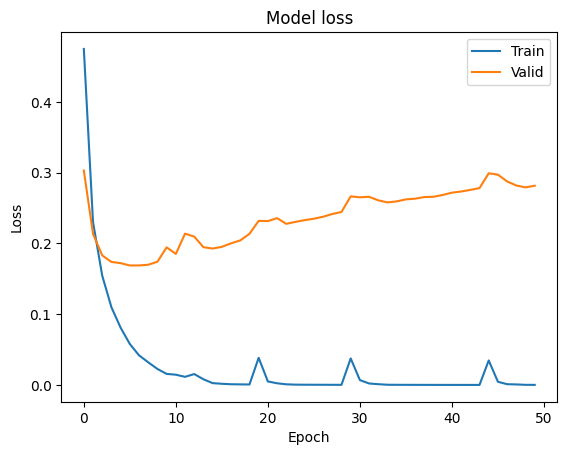

In [101]:
# Plot the loss curves
plt.figure()
plt.plot(range(n_epochs), train_losses, label='Train')
plt.plot(range(n_epochs), valid_losses, label='Valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')
plt.legend()
plt.show()

In [102]:
# テストデータに対する予測精度を算出する
mlp.eval()  # テスト時には勾配を計算しないevalモードにする
test_num = 0
test_true_num = 0
with torch.no_grad():
    for x, t in test_loader:
        # テンソルをGPUに移動
        x = x.to(device)
        t = t.to(device)

        # 順伝播
        y = mlp.forward(x)

        # モデルの出力を予測値のスカラーに変換
        pred = y.argmax(1)

        acc = (pred == t).float().sum().item()
        test_num += t.size(0)
        test_true_num += acc

print('Test Accuracy: {:.3f}'.format(test_true_num / test_num))

Test Accuracy: 0.897


In [103]:
import numpy as np
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Early Stopping
patience = 3
best_loss = np.inf
trigger_times = 0

n_epochs = 20

train_losses = []
valid_losses = []

for epoch in range(n_epochs):
    losses_train = []
    losses_valid = []
    train_num = 0
    train_true_num = 0
    valid_num = 0
    valid_true_num = 0

    mlp.train()  # 訓練時には勾配を計算するtrainモードにする
    for x, t in train_loader:
        # テンソルをGPUに移動
        x = x.to(device)
        t = t.to(device).long() 
        
        # 順伝播
        y = mlp.forward(x)

        # 誤差の計算(クロスエントロピー誤差関数)
        loss = F.cross_entropy(y, t)

        # モデルの出力を予測値のスカラーに変換
        pred = y.argmax(1)

        # 誤差の逆伝播
        optimizer.zero_grad()
        loss.backward()

        # パラメータの更新
        optimizer.step()

        losses_train.append(loss.item())

        acc = (pred == t).float().sum().item()
        train_num += t.size(0)
        train_true_num += acc

    mlp.eval()  # 評価時には勾配を計算しないevalモードにする
    for x, t in val_loader:
        # テンソルをGPUに移動
        x = x.to(device)
        t = t.to(device)
        
        # 順伝播
        y = mlp.forward(x)

        # 誤差の計算(クロスエントロピー誤差関数)
        loss = F.cross_entropy(y, t)

        # モデルの出力を予測値のスカラーに変換
        pred = y.argmax(1)

        losses_valid.append(loss.item())

        acc = (pred == t).float().sum().item()
        valid_num += t.size(0)
        valid_true_num += acc
    
    train_losses.append(np.mean(losses_train))
    valid_losses.append(np.mean(losses_valid))

    print('EPOCH: {}, Train [Loss: {:.3f}, Accuracy: {:.3f}], Valid [Loss: {:.3f}, Accuracy: {:.3f}]'.format(
        epoch,
        np.mean(losses_train),
        train_true_num/train_num,
        np.mean(losses_valid),
        valid_true_num/valid_num
    ))

    # Early stopping
    current_loss = np.mean(losses_valid)
    if current_loss < best_loss:
        best_loss = current_loss
        trigger_times = 0
    else:
        trigger_times += 1
        print('Trigger Times:', trigger_times)
        if trigger_times >= patience:
            print('Early stopping!')
            break
        
# テストデータに対する予測精度を算出する
mlp.eval()  # テスト時には勾配を計算しないevalモードにする
test_num = 0
test_true_num = 0
with torch.no_grad():
    for x, t in test_loader:
        # テンソルをGPUに移動
        x = x.to(device)
        t = t.to(device)

        # 順伝播
        y = mlp.forward(x)

        # モデルの出力を予測値のスカラーに変換
        pred = y.argmax(1)

        acc = (pred == t).float().sum().item()
        test_num += t.size(0)
        test_true_num += acc

print('Test Accuracy: {:.3f}'.format(test_true_num / test_num))


EPOCH: 0, Train [Loss: 0.000, Accuracy: 1.000], Valid [Loss: 0.283, Accuracy: 0.958]
EPOCH: 1, Train [Loss: 0.000, Accuracy: 1.000], Valid [Loss: 0.285, Accuracy: 0.958]
Trigger Times: 1
EPOCH: 2, Train [Loss: 0.000, Accuracy: 1.000], Valid [Loss: 0.287, Accuracy: 0.958]
Trigger Times: 2
EPOCH: 3, Train [Loss: 0.000, Accuracy: 1.000], Valid [Loss: 0.289, Accuracy: 0.958]
Trigger Times: 3
Early stopping!
Test Accuracy: 0.898
